## Problem Statement
---------------------

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


The data contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default. default.

-------------------------------------

### Import necessary modules
--------------------------------

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import datetime

### Reading data from csv file into pandas dataframe
--------------------------------------------


In [7]:
loan_df = pd.read_csv("loan.csv")
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
loan_df.shape

(39717, 111)

### Cleaning up data
-------------------------------

In [9]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### From the above null check, we can determine that there are quite a few rows which have all null values. We don't need these columns. Let's remove them first.

In [10]:
loan_df.dropna(axis = 1, how = 'all', inplace = True)

In [11]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### From the csv file we can see that quite a few columns, like "pymnt_plan" have only one value. These won't help with our analysis. Hence dropping them.

In [12]:
loan_df.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


#### With the remaining 48 columns, lets take a closer look at which columns we require most to get insights about defaulters before approval of loan, or to identify customers most likely to pay the loan.
------------------------------------
* Credit information related columns eg.delinq_2yrs aren't of use as they come into picture once the loan has been approved.
* Columns like id, member_id, url and zip_code columns as they don't help with demographic related insights much.
* desc or Description is not useful to us as well.

In [13]:
loan_df.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [14]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Charged Off,car,GA,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Fully Paid,small_business,IL,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Fully Paid,other,CA,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Current,other,OR,17.94,Jan-96,0,15,0,53.90%,38


#### For this analysis, we want to find patterns for defaultors which can only be possible for Fully paid or Charged off loans and not current loans. Let's drop rows where data against Current loans exist.

In [15]:
loan_df = loan_df[loan_df.loan_status != "Current"]

In [16]:
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [17]:
loan_df.shape

(38577, 22)

#### Next we will Check for missing values

In [18]:
(loan_df.isna().sum()/len(loan_df.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

#### Two columns have missing values. Let's check their datatypes and fill data if possible, else drop these columns.

In [19]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  addr_state           38577 non-null  object 
 15  dti                  38577 non-null  floa

In [20]:
# Fill the null values with the mode of emp_length field
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
loan_df.emp_length.isna().sum()

0

In [21]:
loan_df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_df.revol_util.isna().sum()

0

In [22]:
# Standardizing the data
loan_df.revol_util = pd.to_numeric(loan_df.revol_util.apply(lambda x : str(x).split('%')[0]))
loan_df.int_rate = pd.to_numeric(loan_df.int_rate.apply(lambda x : str(x).split('%')[0]))
loan_df.emp_length = pd.to_numeric(loan_df.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [23]:
# Loan to annual income variable
import datetime
loan_df['l_t_ai'] = round(loan_df['loan_amnt']/loan_df['annual_inc'],2)
loan_df['issue_year'] = loan_df['issue_d'].apply(lambda x : datetime.datetime.strptime(x, '%b-%y').year)
loan_df = loan_df.reset_index(drop=True)
#loans['issue_year']
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)
loan_df.shape

(38527, 24)

#### Outlier Treatment

<Axes: >

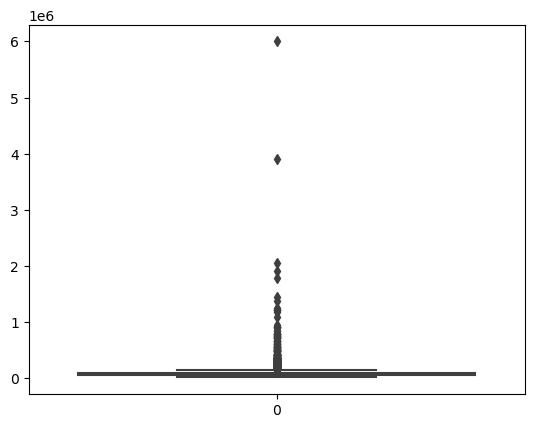

In [24]:
# annual_inc looks like it has potential outliers
sns.boxplot(loan_df['annual_inc'])

##### Let's remove the outliers now

In [25]:
quantile_data = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

In [26]:
quantile_data

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [27]:
per_95_a_i = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= per_95_a_i]

<Axes: >

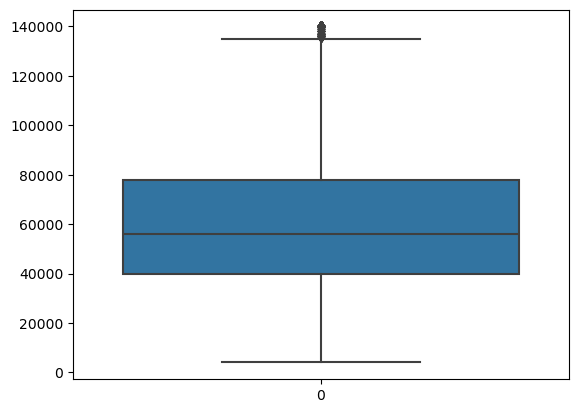

In [28]:
sns.boxplot(loan_df.annual_inc)

<Axes: >

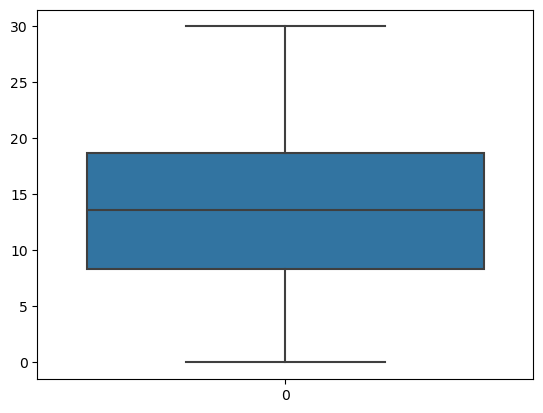

In [29]:
# Next let's look at dti column
sns.boxplot(loan_df.dti)

<Axes: >

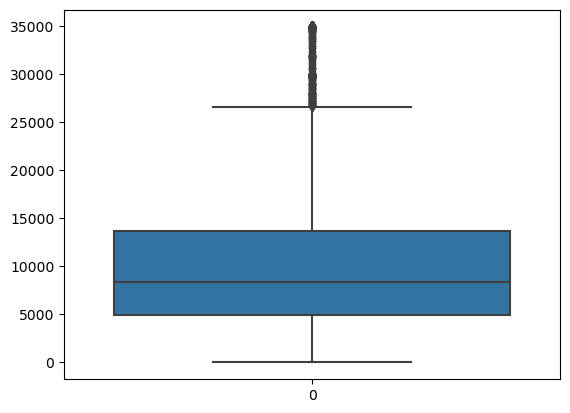

In [30]:
# Another such column could be funded_amnt_inv
sns.boxplot(loan_df.funded_amnt_inv)

##### There are outliers for funded_amt_inv but they are not too far from the distribution, hence we will persist them.

### Visualisations
-----------------------------------------

##### Let's start by looking at the loan status distribution between the fully paid and charged off statuses.

<Axes: xlabel='loan_status', ylabel='count'>

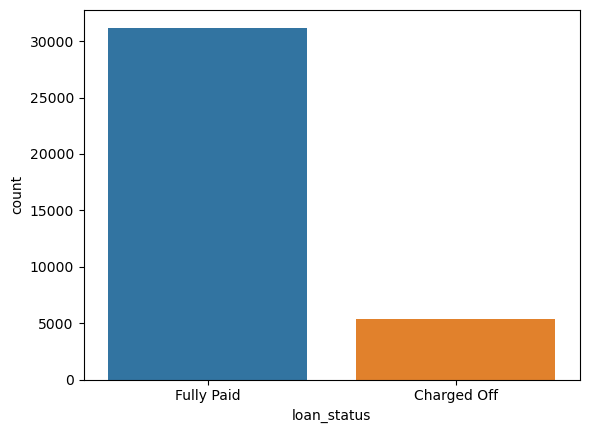

In [31]:
sns.countplot(x = 'loan_status', data = loan_df)

In [32]:
loan_df.sub_grade = pd.to_numeric(loan_df.sub_grade.apply(lambda x : x[-1]))

<Axes: xlabel='grade', ylabel='count'>

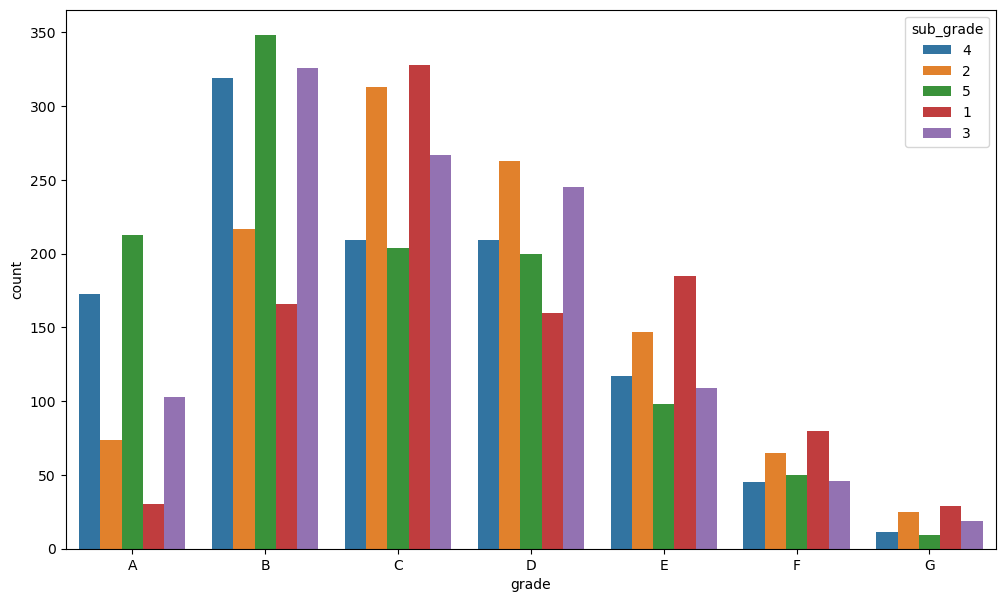

In [33]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('tab10')
loan_df['sub_grade'] = loan_df['sub_grade'].astype(str)
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

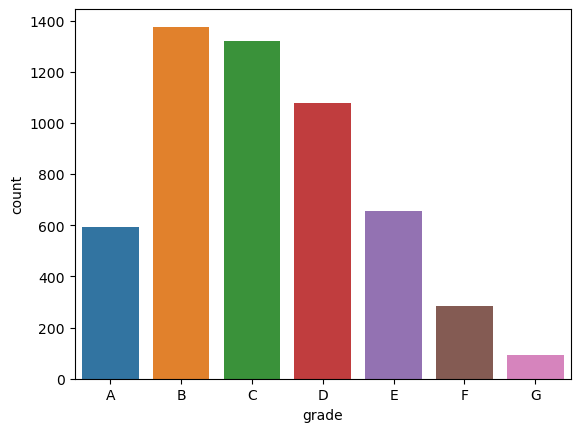

In [34]:
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

##### Let us now look at the purpose for which loan was taken.

<Axes: xlabel='count', ylabel='purpose'>

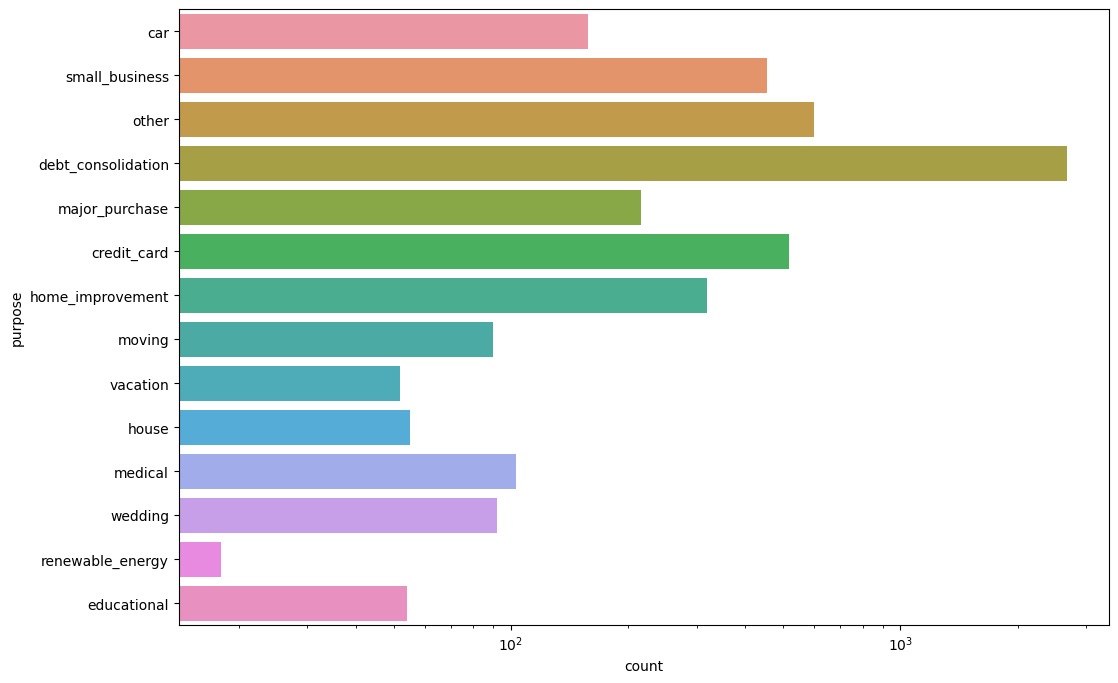

In [35]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])

#### Let's analyze Home ownership metrics next.

In [36]:
loan_df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [37]:
# Replacing NONE with OTHERS since only 3 records found for NONE
loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHERS',inplace = True)

<Axes: xlabel='home_ownership', ylabel='count'>

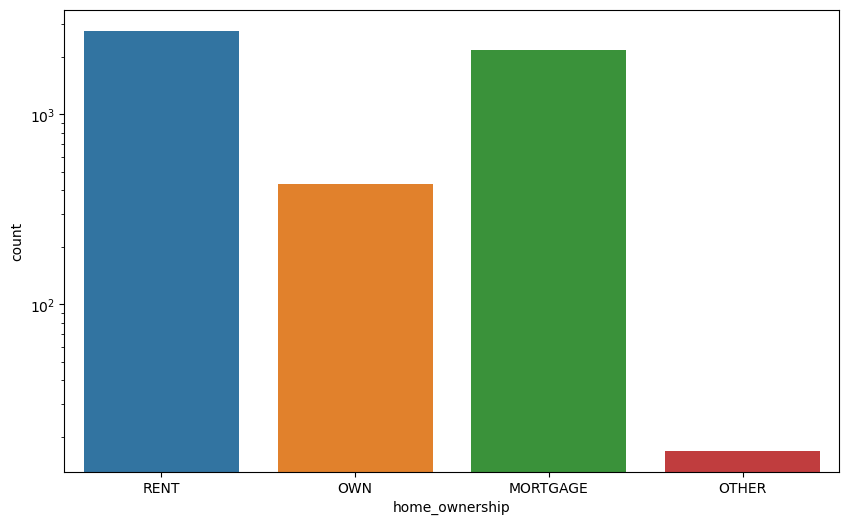

In [38]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])

In [39]:
# Plotting average overall default rate for percentage based analysis
sns.set(style="darkgrid")
def plt_frequency(x_var,data_df,x_label,title,hue_var=None,rot_flag=0,fig_size_x=12,fig_size_y=5):
    ncount = len(loan_df)
    xy = (fig_size_x,fig_size_y)
    plt.figure(figsize=xy)
    ax = sns.countplot(x=x_var, data=data_df,hue=hue_var,palette="Set2")
    plt.title(title)
    plt.xlabel(x_label)

    # Making twin axes
    ax2=ax.twinx()

    # To switch so that count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    if(rot_flag==1):
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
        plt.tight_layout()
    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    ax2.grid(None)


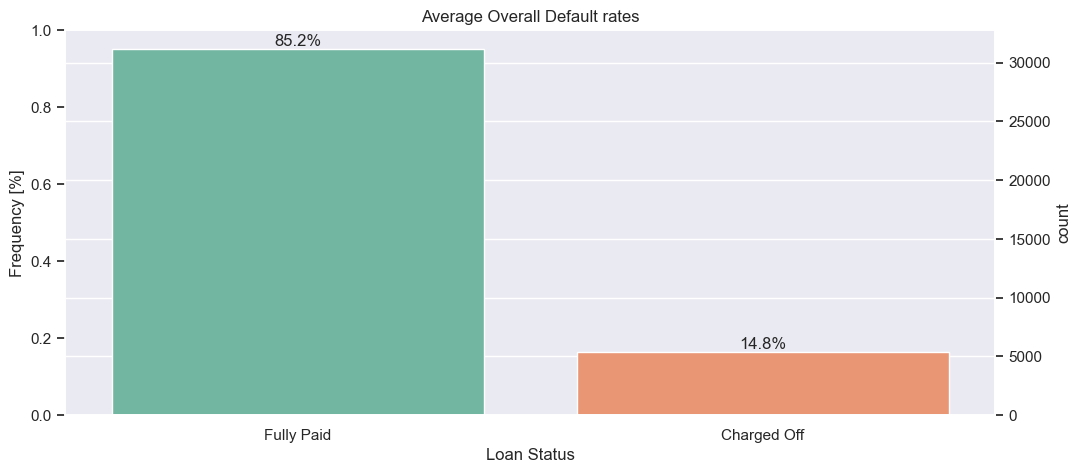

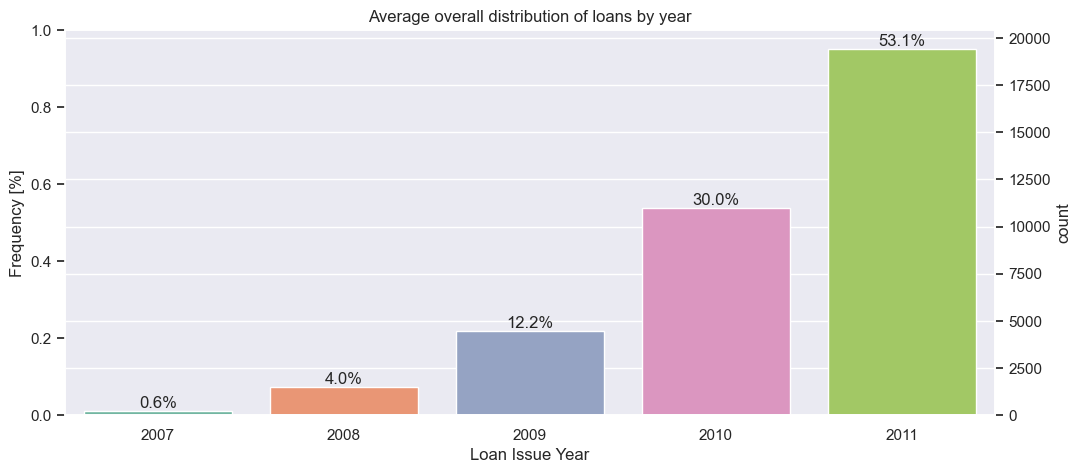

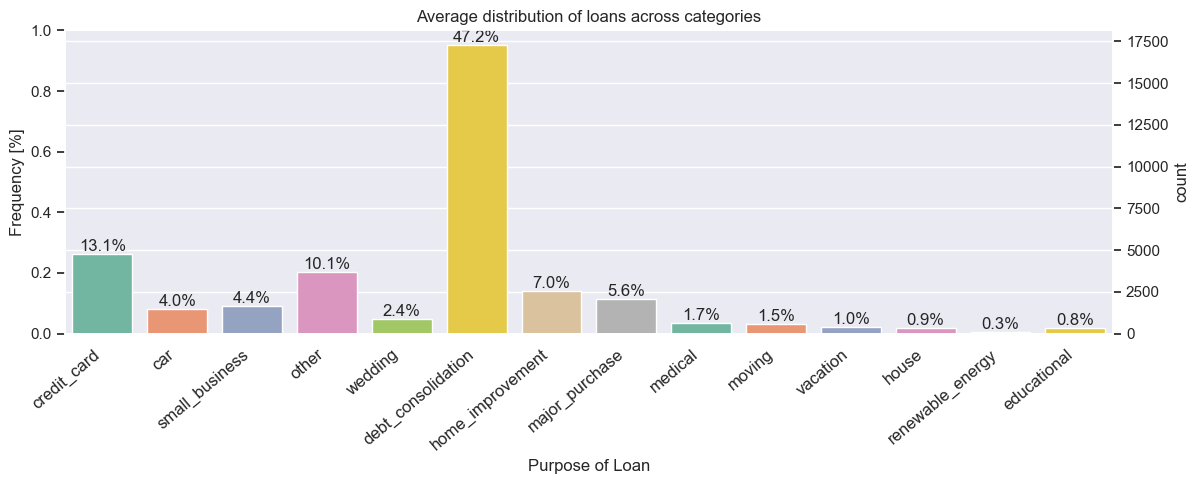

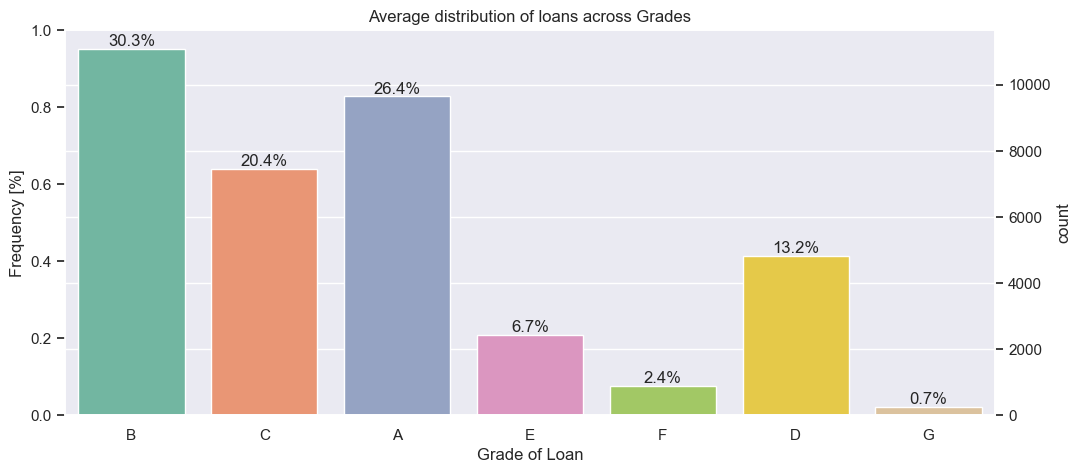

In [40]:
# Plots for loan status, issue year, loan purpose and loan grade
plt_frequency("loan_status",loan_df,'Loan Status','Average Overall Default rates')
plt_frequency("issue_year",loan_df,'Loan Issue Year','Average overall distribution of loans by year')
plt_frequency("purpose",loan_df,'Purpose of Loan','Average distribution of loans across categories',None,1)
plt_frequency("grade",loan_df,'Grade of Loan','Average distribution of loans across Grades')

#### Next we will create bins from pre-existing data that can give categorical information to us

In [41]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%'])
loan_df['open_acc_groups'] = pd.cut(loan_df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_df['revol_util_groups'] = pd.cut(loan_df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_df['total_acc_groups'] = pd.cut(loan_df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_df['annual_inc_groups'] = pd.cut(loan_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [42]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,l_t_ai,issue_year,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,0,83.7,9,0.21,2011,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,0,9.4,4,0.08,2011,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,0,98.5,10,0.20,2011,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,0,21.0,37,0.20,2011,13%-17%,2-10,20-40,20-37,31k-58k
4,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,0,28.3,12,0.14,2011,5%-9%,2-10,20-40,2-20,31k-58k


Text(0.5, 0, 'Interest Rate')

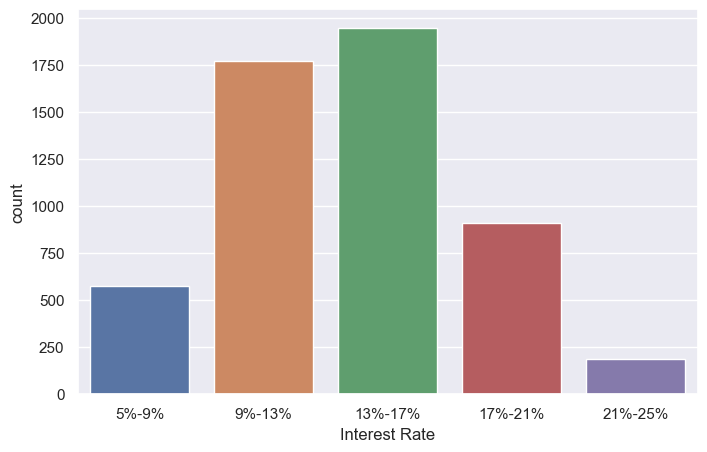

In [43]:
fig, ax = plt.subplots(figsize = (8,5))
sns.countplot(x='int_rate_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')


Text(0.5, 0, 'Employment in years')

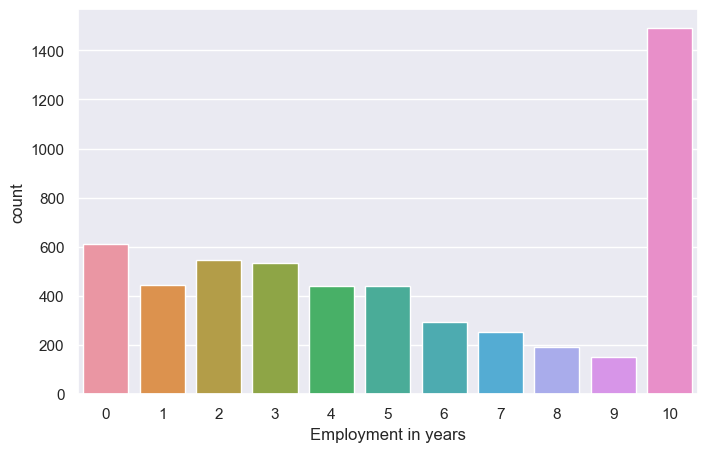

In [44]:
fig, ax = plt.subplots(figsize = (8,5))
sns.countplot(x='emp_length', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Employment in years')

<Axes: xlabel='open_acc_groups', ylabel='count'>

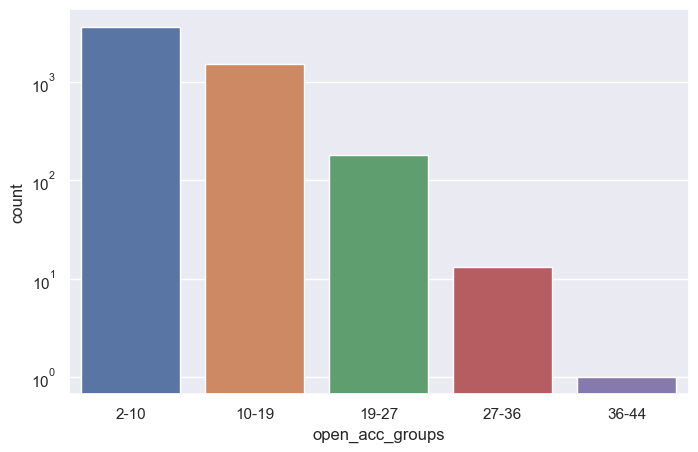

In [45]:
fig, ax = plt.subplots(figsize = (8,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

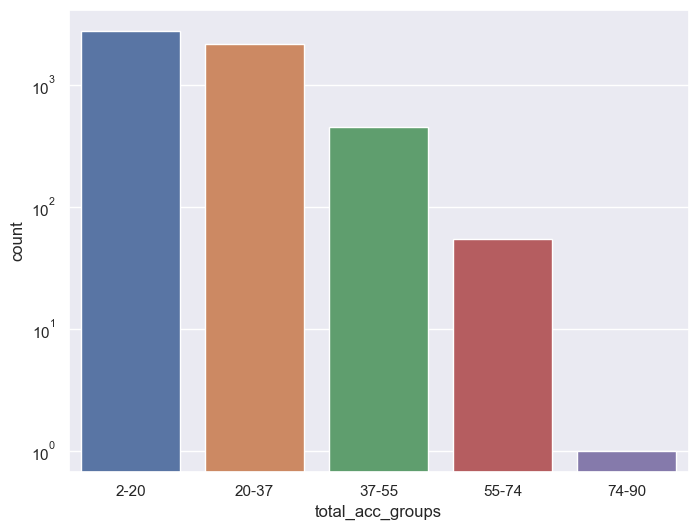

In [46]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

Text(0.5, 0, 'Annual income groups')

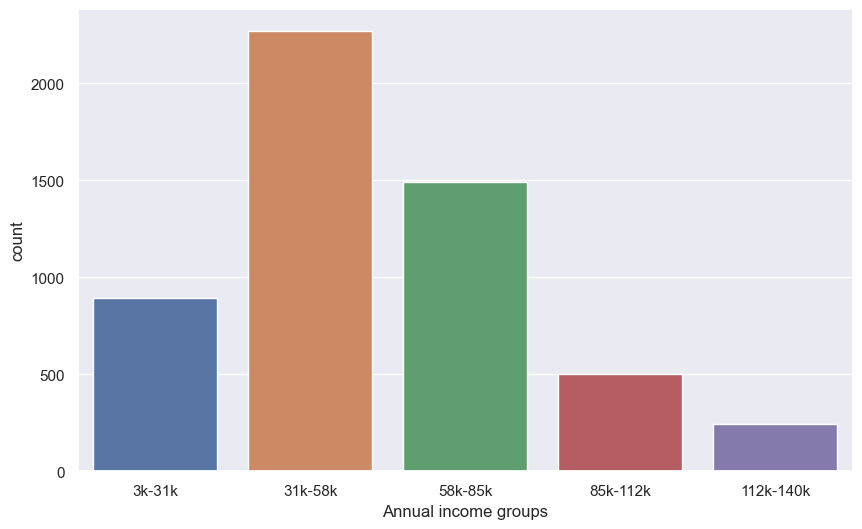

In [47]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Annual income groups')

<Axes: xlabel='revol_util_groups', ylabel='count'>

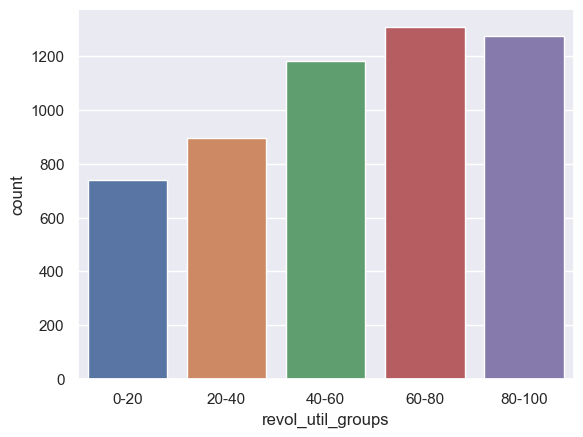

In [48]:
sns.countplot(x='revol_util_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

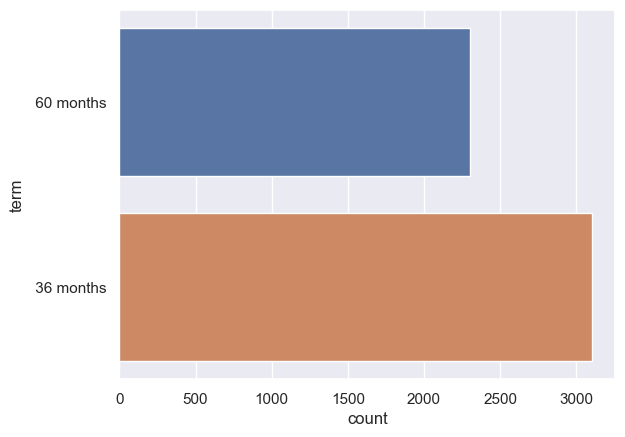

In [49]:
sns.countplot(y='term', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### Verification Status of loans

<Axes: xlabel='verification_status', ylabel='count'>

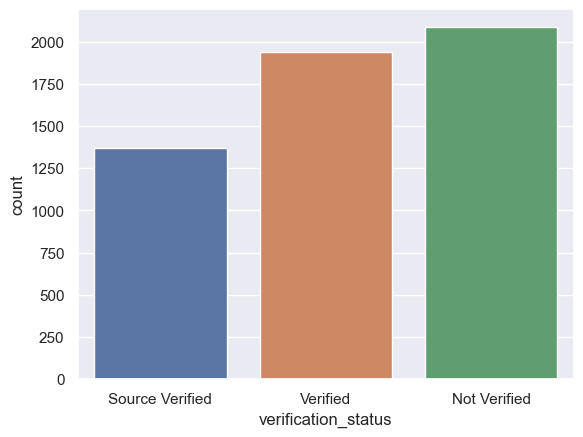

In [50]:
sns.countplot(x='verification_status', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### Let's now analyze by timeframes

In [51]:
## Extracting month and year
df_mm_yy = loan_df['issue_d'].str.partition("-", True)     
loan_df['issue_month']=df_mm_yy[0]                       
loan_df['issue_year']= '20' + df_mm_yy[2]

<Axes: xlabel='issue_month', ylabel='count'>

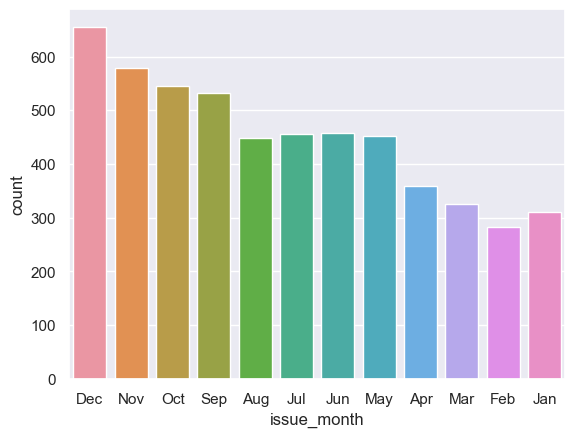

In [52]:
sns.countplot(x='issue_month', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='issue_year', ylabel='count'>

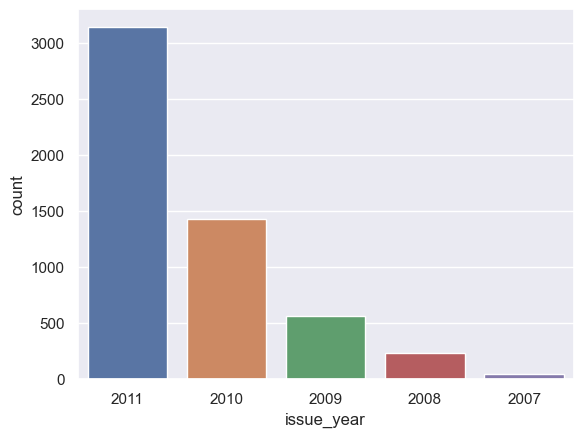

In [53]:
sns.countplot(x='issue_year', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### Hence we can see that maximum number of defaults happened with loans issued in December month. Similiarly 2011 had the most number of loan defaults.

In [54]:
# New bins to analyze installments loan amounts, funded amounts etc.
loan_df['installment_groups'] = pd.cut(loan_df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_df['funded_amnt_inv_group'] = pd.cut(loan_df['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_df['loan_amnt_groups'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_df['dti_groups'] = pd.cut(loan_df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

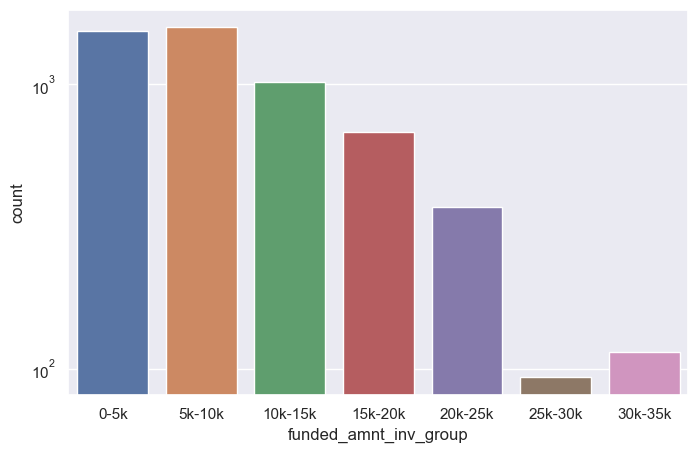

In [55]:
fig,ax = plt.subplots(figsize = (8,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

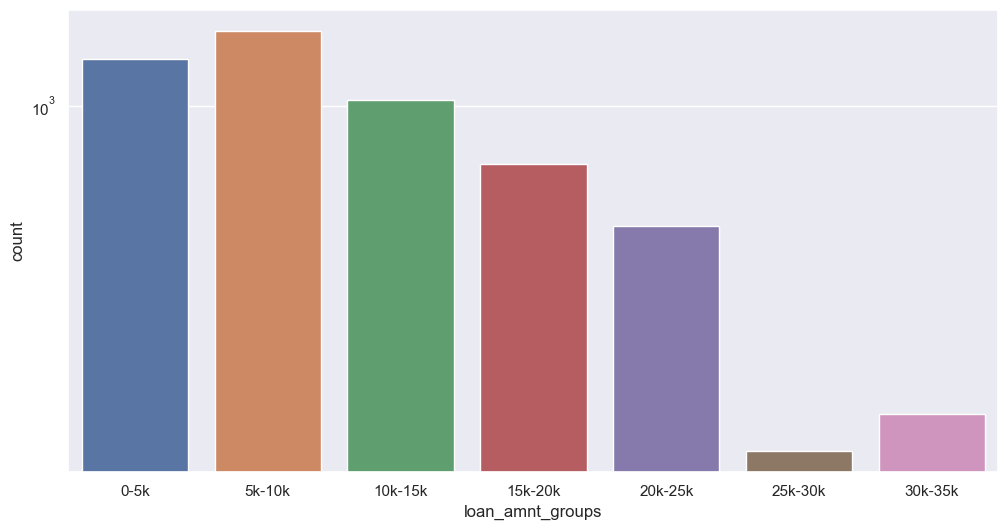

In [56]:
fig,ax = plt.subplots(figsize = (12,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

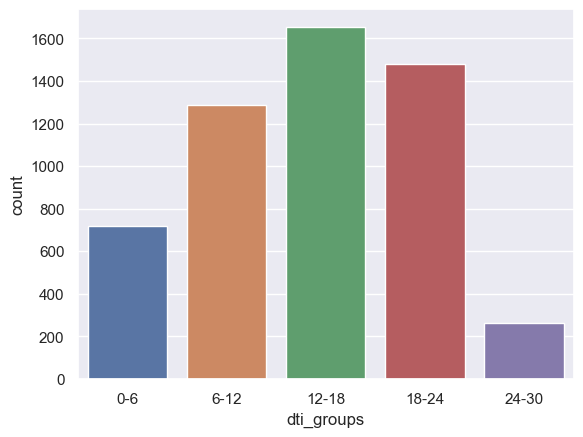

In [57]:
sns.countplot(x='dti_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

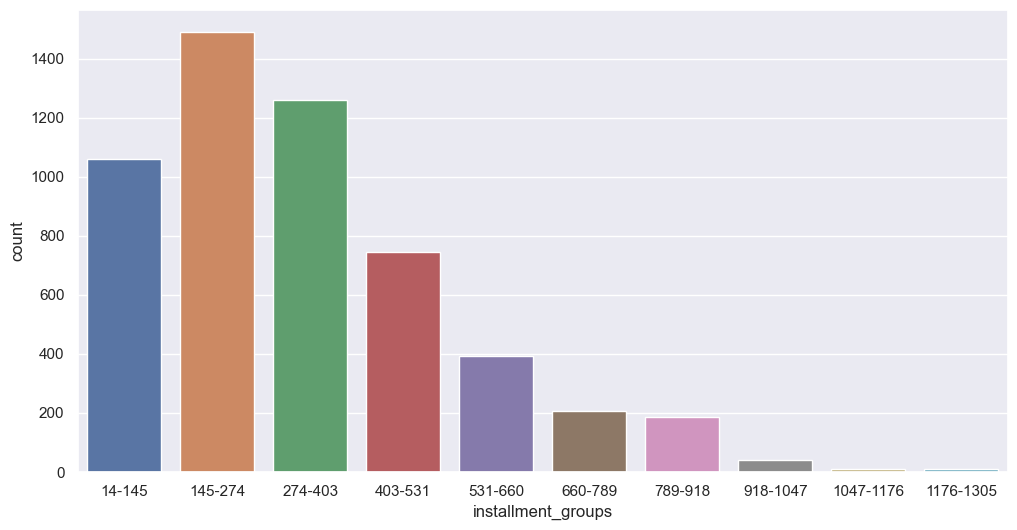

In [58]:
fig,ax = plt.subplots(figsize = (12,6))
sns.countplot(x='installment_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

#### Let's try to analyze these data by bifurcating into simpler categoy further.

In [59]:
def dti_range_calculator(dti):
    if dti <= 10.00:
        return 'low'
    elif (dti >10.00 and dti <= 20.00):
        return 'medium'
    else:
        return 'high'
        
def loan_to_annual_income_range_calculator(l_t_ai):
    if l_t_ai <= 0.10:
        return 'low'
    elif (l_t_ai >0.10 and l_t_ai <= 0.20):
        return 'medium'
    else:
        return 'high'

def experience_level(exp):
    if exp <= 3:
        return 'Junior'
    elif (exp >3 and exp <= 7):
        return 'Senior'
    else:
        return 'Specialist'

category_list = ['debt_consolidation','credit_card','other','home_improvement','major_purchase','small_business']
loan_df = loan_df.query('purpose == @category_list')
loan_df['dti_range'] = loan_df['dti'].apply(lambda x : dti_range_calculator(x) )
loan_df['l_t_ai_range'] = loan_df['l_t_ai'].apply(lambda x : loan_to_annual_income_range_calculator(x) )
loan_df['exp_level'] = loan_df['emp_length'].apply(lambda x : experience_level(int(x)))
loan_df['int_rate_float'] = loan_df['int_rate'].apply(lambda x : float(str(x).replace('%','')))

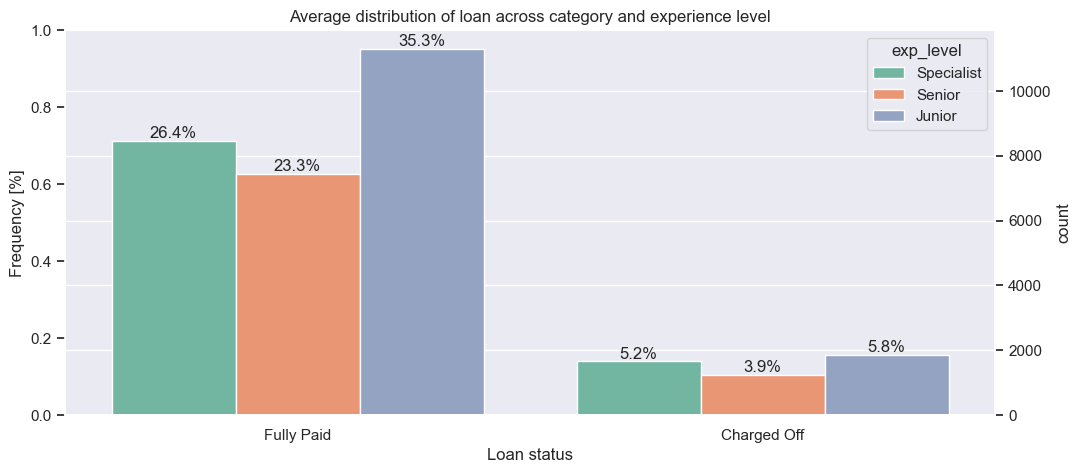

In [60]:
plt_frequency("loan_status",loan_df,'Loan status','Average distribution of loan across category and experience level','exp_level')

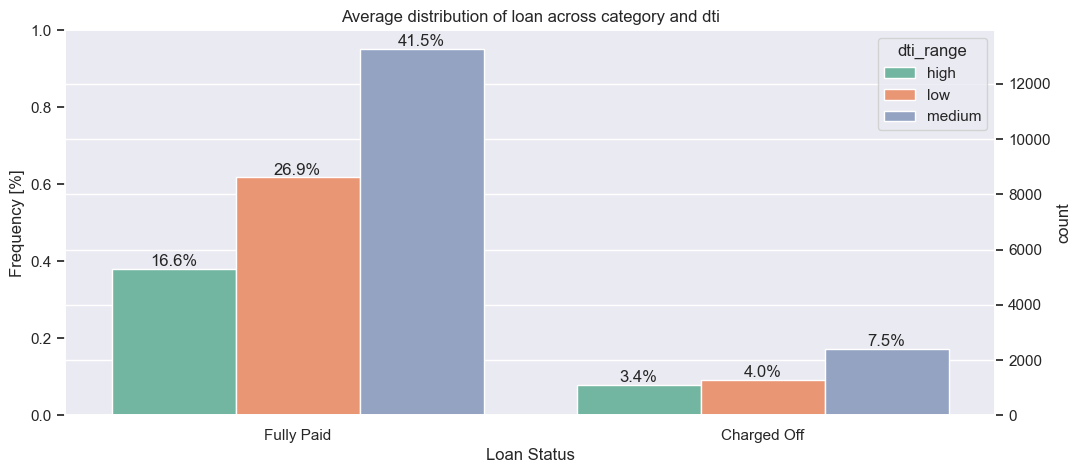

In [61]:
plt_frequency("loan_status",loan_df,'Loan Status','Average distribution of loan across category and dti','dti_range')

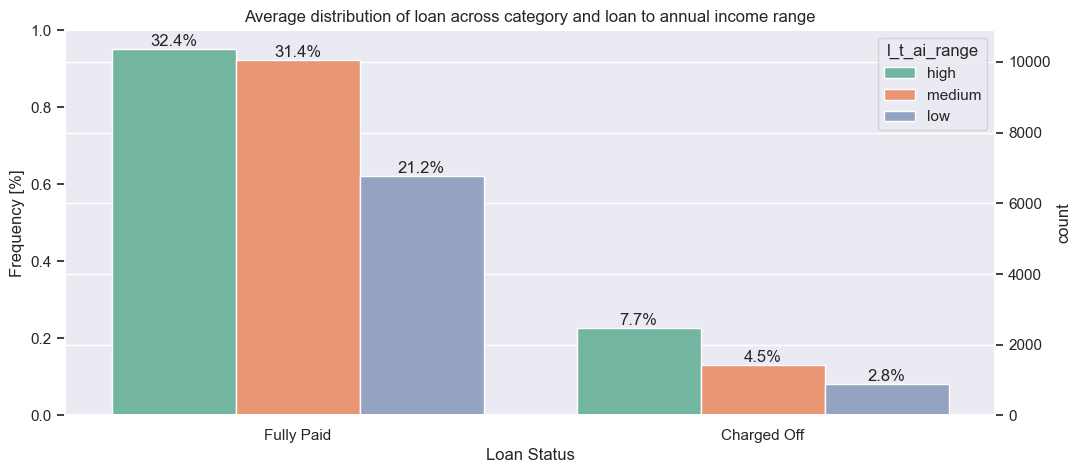

In [62]:
plt_frequency("loan_status",loan_df,'Loan Status','Average distribution of loan across category and loan to annual income range','l_t_ai_range')

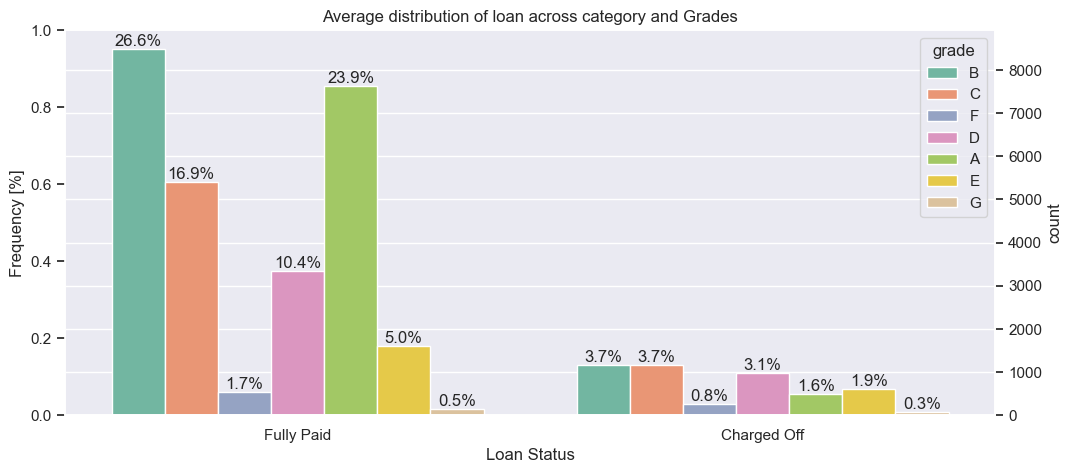

In [63]:
plt_frequency("loan_status",loan_df,'Loan Status','Average distribution of loan across category and Grades','grade')

----------------------------------------------

#### Let's now interpret these metrics for Charged off loans. The defaultors were generally observed to have these characteristics.
-----------------------------------------------
1. Customers who have an income of range 31201 - 58402.
2. Customers that receive interest rate of 13-17%.
3. Customers who are on 'Rent'.
4. Amount funded is in the range 5000-10000
5. Lower term is more vulnerable.
6. Customers with 20-37 open_acc.
7. If the loan status is "Not verified".
8. Customers employed for 10 years.
9. Grade is B.
10. Customers who took loan to clear prior debts.
11. Customers who took loan in December, or the year 2011.
---------------------------------------------

### Bi-variate Analysis
----------------------------------

##### Now we will try to compare two dimensions agains each other. First let's look at various metrics against defaulted loans.

<Figure size 1000x800 with 0 Axes>

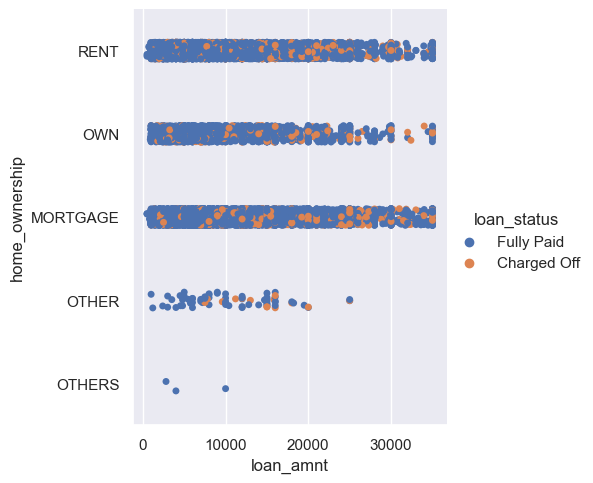

In [64]:
# Loan amount vs House Ownership
plt.figure(figsize=(10,8))
sns.catplot(data =loan_df,x='loan_amnt', y='home_ownership', hue ='loan_status')
plt.show()

<Axes: xlabel='issue_year', ylabel='loan_amnt'>

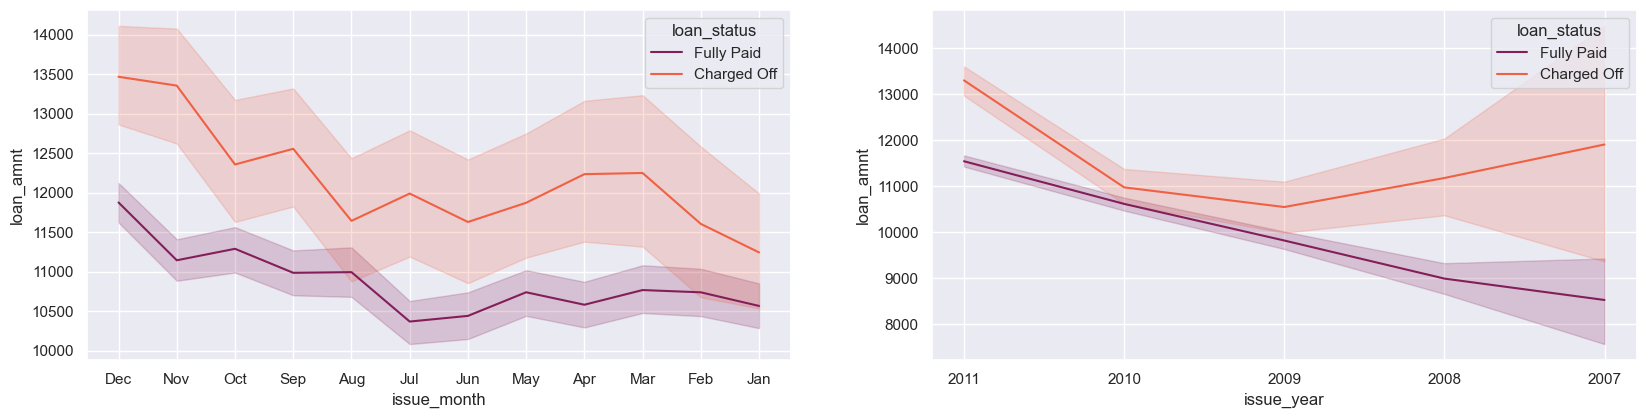

In [65]:
# Loan amount against month and year
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.lineplot(data =loan_df,y='loan_amnt', x='issue_month', hue ='loan_status',palette="rocket")
plt.subplot(222)
sns.lineplot(data =loan_df,y='loan_amnt', x='issue_year', hue ='loan_status',palette="rocket")

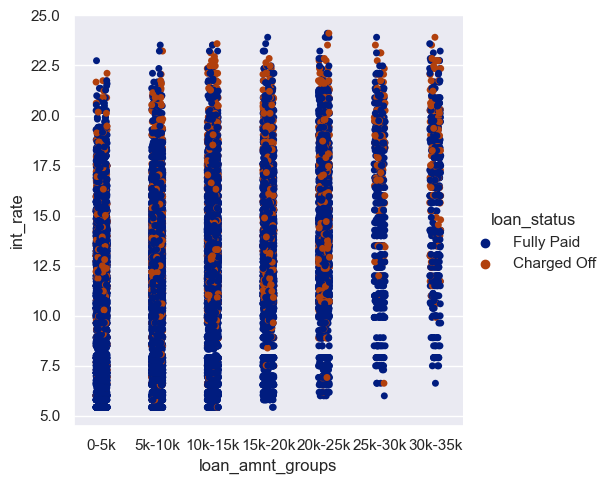

In [66]:
# Loan amount vs interest rates distribution

sns.catplot(data =loan_df,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="dark")

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

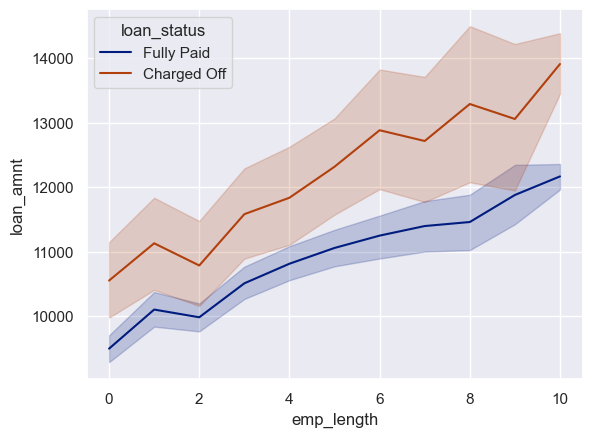

In [67]:
# Loan amount vs Employment tenure
sns.lineplot(data =loan_df,y='loan_amnt', x='emp_length', hue ='loan_status',palette="dark")

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

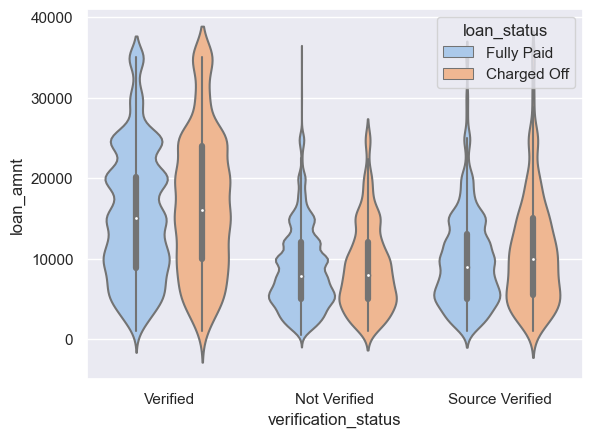

In [68]:
# Loan amount vs Verification status
sns.violinplot(data =loan_df,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

##### Next let us analyze how different variables are correlated with each other

In [69]:
correl_df = loan_df.filter(["loan_amnt", "funded_amnt", "funded_amnt_inv",'int_rate_float','installment','emp_length','annual_inc','dti','l_t_ai']) 
cor = correl_df.corr()
round(cor, 3)

,loan_amnt,funded_amnt_inv,int_rate_float,installment,emp_length,annual_inc,dti,l_t_ai
loan_amnt,1.000,0.935,0.300,0.928,0.136,0.409,0.087,0.671
funded_amnt_inv,0.935,1.000,0.297,0.900,0.149,0.386,0.094,0.623
int_rate_float,0.300,0.297,1.000,0.276,-0.007,0.063,0.111,0.224
installment,0.928,0.900,0.276,1.000,0.107,0.405,0.075,0.607
emp_length,0.136,0.149,-0.007,0.107,1.000,0.159,0.049,0.019
annual_inc,0.409,0.386,0.063,0.405,0.159,1.000,-0.087,-0.288
dti,0.087,0.094,0.111,0.075,0.049,-0.087,1.000,0.135
l_t_ai,0.671,0.623,0.224,0.607,0.019,-0.288,0.135,1.000


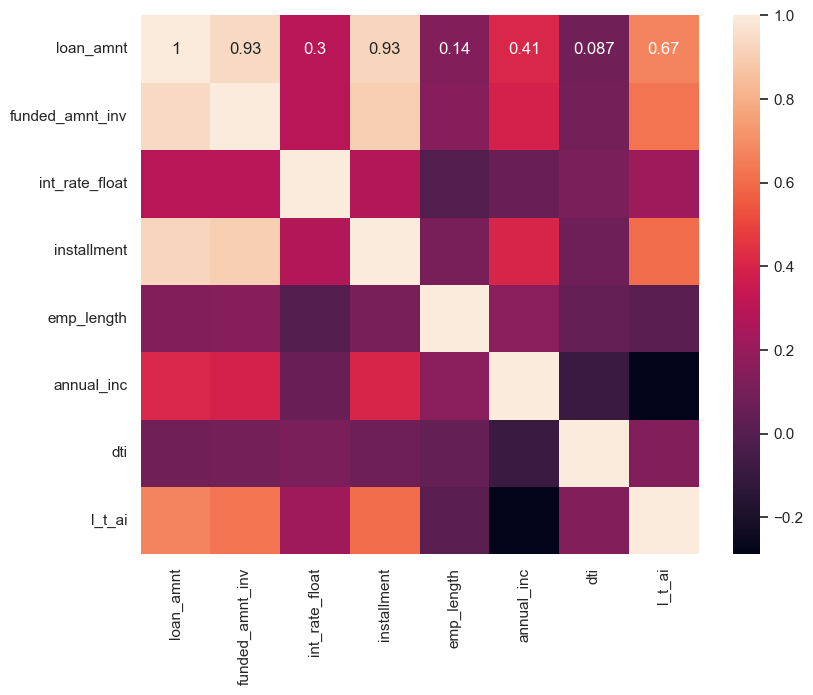

In [70]:
# Plotting HeatMap for this correlation
plt.figure(figsize=(9,7))
sns.heatmap(cor, cmap="rocket", annot=True)
plt.show()

<Axes: xlabel='loan_amnt_groups', ylabel='int_rate'>

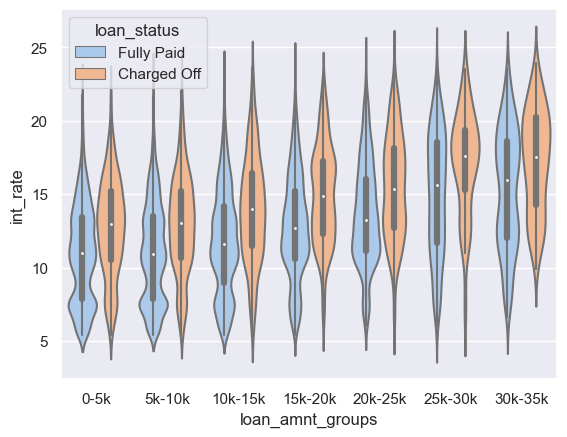

In [71]:
# Interest Rates vs Loan Status
sns.violinplot(data =loan_df,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel")

<Axes: xlabel='term', ylabel='loan_amnt'>

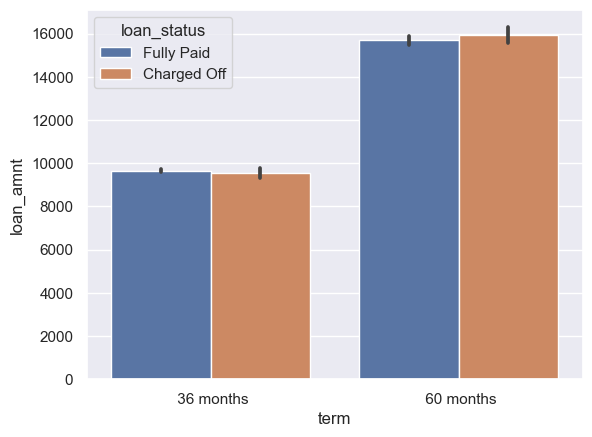

In [72]:
sns.barplot(x = 'term', y = 'loan_amnt', data = loan_df,hue = 'loan_status')

#### From the plots shown above, we can find a strong correlation between interest rates and count of loan defaulters. Fully paid loans were mostly of lower interest rates whereas Charged Off loans were of higher interest rates.
#### We can also see correlation between fields like annual income and dti, funded amount and employment tenure etc.
#### No major difference was seen when comparing status of loan with the loan term.

---------------------------------------------
------------------------------------------------
### Final Observations
-------------------------------------------

#### From this Exploratory Data Analysis we have observed these trends.
##### There is a higher probability to find a defaulting customer in the following cases:

* Those who receive interest at the rate of 21-24% and have an income in the range of 70k-80k.
* If employment tenure is 10 yrs and loan amount is 12k-14k.
* If it is a verified loan for an amount ranging over 16k.
* When the loan is for 60k-70k and the applicant took it for "Home Improvement".
* Customers who take a loan for 60k-70k and don't own a home, i.e. either Rent or Mortgage.
* When the grade is F and loan amount is between 15k-20k.

##### We also observed a few good traits for people who fully paid their loans

* If home is self owned, such customers are more likely to fully pay.
* Lower interest rates were an important factor in fully paid loans.
* Lower sanctioned amounts between 5k-10k were mostly fully paid.
* Lower employment tenure between 3-6 years showed a good trend.
* Grade B loans were generally fully paid.
* Lower ratio of loan amount to annual income meant that these customers were less likely to default.